In [0]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing our cancer dataset
dataset = pd.read_csv('/content/cancer_dataset.csv')

In [2]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print('Cancer data set dimensions : {}'.format(dataset.shape))

Cancer data set dimensions : (569, 32)


diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

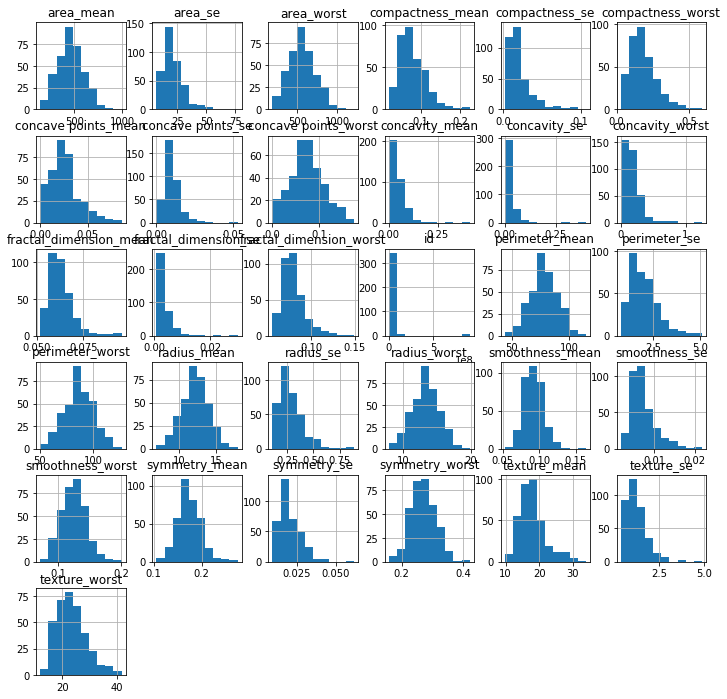

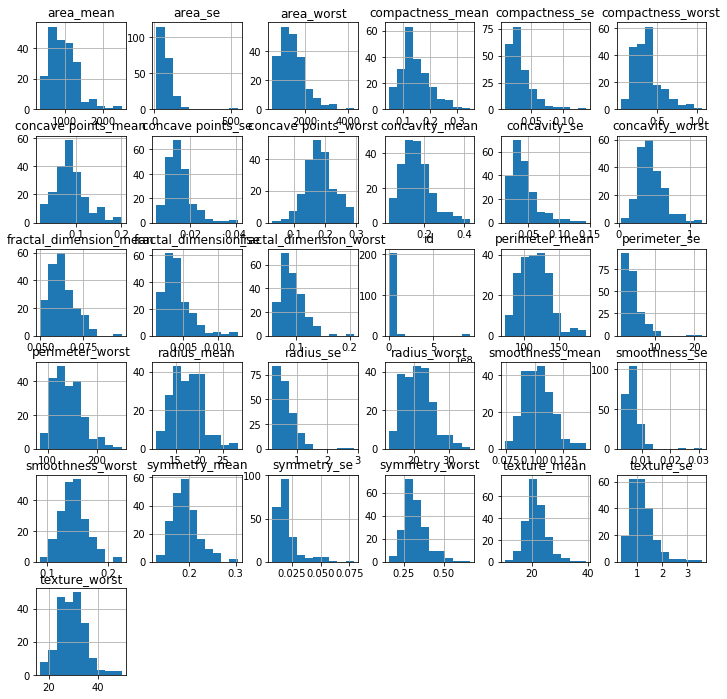

In [4]:
#Visualization of data
dataset.groupby('diagnosis').hist(figsize=(12, 12))

In [5]:
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [0]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
def labelEncoding(data):
  labelencoder_Y = LabelEncoder()
  return(labelencoder_Y.fit_transform(data))

In [0]:
dataset['diagnosis'] = labelEncoding(dataset['diagnosis'])

In [0]:
import seaborn as sns

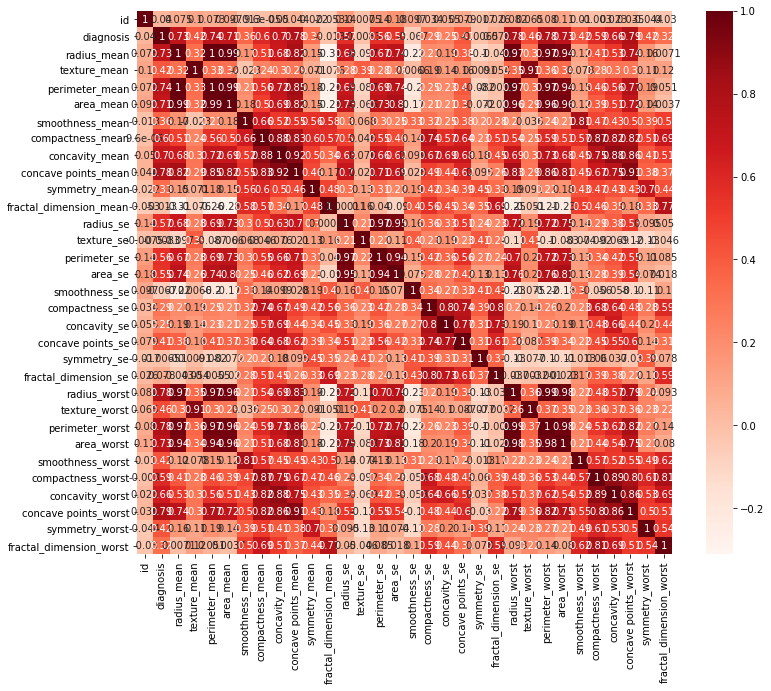

In [9]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
#Correlation with output variable
cor_target = abs(cor["diagnosis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [0]:
dataframe = dataset[relevant_features.keys()].copy()

In [12]:
print('New Cancer dataframe dimensions : {}'.format(dataframe.shape))

New Cancer dataframe dimensions : (569, 16)


In [0]:
Y = dataset['diagnosis']
X = dataset.drop('diagnosis', axis=1)

In [0]:
Y = labelEncoding(Y)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [0]:
classifiers = []
model1 = LogisticRegression(random_state = 0)
classifiers.append(model1)
model2 = SVC()
classifiers.append(model2)
model3 = DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = KNeighborsClassifier()
classifiers.append(model5)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
for clf in classifiers:
    clf.fit(X_train, Y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(Y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is 0.958041958041958
Confusion Matrix of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is [[87  3]
 [ 3 50]]
Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 0.958041958041

In [20]:
#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
#Fitting SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [24]:
#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
#predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.986013986013986

In [0]:
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)


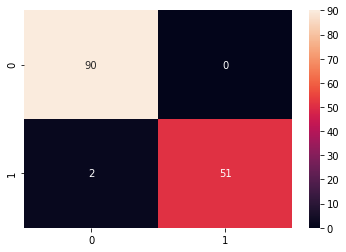

In [28]:
sns.heatmap(cm, annot=True)

What were are looking for:

*   Please show all your work in Python Jupyter notebook.
*   Using data visualization tools, please explain how we can understand the data structure.
*   Please explain if dimensionality reduction is required/possible or not. How did you check?
*   Please explain eigen-vectors and eigen-values and their importance.
*   Which classification methods are you using? How do you decide among different methods?
*   Please provide a confusion matrix and explain how it can help us to check the reliability of the result.
*   Please provide the learning curve and explain how it can help us in determining whether the model is being over-fit or under-fit.
*   When do you consider adding the “regularization parameter” to the model? and how it will help to improve the model performance?
*   Please briefly explain how reinforcement-learning can be utilized in fraud detection models.
*   Please describe when to use logistic sigmoid, tanh, and Fourier as basis function








*   **Using data visualization tools, please explain how we can understand the data structure.**

*   **Please explain if dimensionality reduction is required/possible or not. How did you check?**

Dimensionality reduction is required because the higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

**how to check?**
There are many techniques for Dimensionality reduction but here I have used correlation matrix. I have mentioned the code below. I am filtering the fetures whic is higly corelated with target variable. Here threshold value is 0.5.

```
#Correlation with output variable
cor_target = abs(cor["diagnosis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
```



*  **Please explain eigen-vectors and eigen-values and their importance.**

**Eigen-vectors -**
An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it.

**Eigenvalue -**The scalar that is used to transform (stretch) an Eigenvector.

When you apply transformations to the systems/objects represented by matrices, and you need some characteristics of these matrices you have to calculate eigenvectors (eigenvalues).

Eigenvalues ​​characterize important properties of linear transformations, such as whether a system of linear equations has a unique solution or not. In many applications eigenvalues ​​also describe physical properties of a mathematical model.

**Some important applications -**


*   Principal Components Analysis (PCA) in object/image recognition;

*   Market risk analysis - to define if a matrix is positive definite;
*   PageRank from Google.


*   **Which classification methods are you using? How do you decide among different methods?**
Here I have used total 5 classification algorithms. Please see the accuracy score of all the algorithm below.
*   Logistics Regression  accuracy 95%
*   KNN                   accuracy 95%
*   SVM                   accuracy 95%
*   Decision Tree         accuracy 91%
*   Random Forest         accuracy 96%


When we have many classification algorithm and we want to check that accuracy and confusion matrix of each algorithm. I have appended all algorithm model in a single array and iterate this array to check accuracy and confusion matrix of each one. Please see the code. 
```
classifiers = []
model1 = LogisticRegression(random_state = 0)
classifiers.append(model1)
model2 = SVC()
classifiers.append(model2)
model3 = DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = KNeighborsClassifier()
classifiers.append(model5)


for clf in classifiers:
    clf.fit(X_train, Y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(Y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))
```







*  **Please provide a confusion matrix and explain how it can help us to check the reliability of the result.**
A confusion matrix is a summary of prediction results on a classification problem. 
I have written code for confusion matrix for all 5 classifier. Below confusion matrix is of Random Forest.
![alt text](https://media.geeksforgeeks.org/wp-content/uploads/Confusion_Matrix1_1.png)

[[86  4]

 [ 1 52]]

 Accuracy = (TP+TN)/(TP+FN+FP+TN)
          = (86+52)/(86+4+1+52)
          = 138 % 143 = 0.965034 accuracy

* **Please provide the learning curve and explain how it can help us in determining whether the model is being over-fit or under-fit.**

A learning curve is a plot that shows time or experience on the x-axis and learning or improvement on the y-axis,



*   **Underfit Learning Curves**
Underfitting refers to a model that cannot learn the training dataset.
An underfit model can be identified from the learning curve of the training loss only.

It may show a flat line or noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all.

![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/Example-of-Training-Learning-Curve-Showing-An-Underfit-Model-That-Does-Not-Have-Sufficient-Capacity.png)

An underfit model may also be identified by a training loss that is decreasing and continues to decrease at the end of the plot.

This indicates that the model is capable of further learning and possible further improvements and that the training process was halted prematurely.

![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/12/Example-of-Training-Learning-Curve-Showing-An-Underfit-Model-That-Requires-Further-Training.png)

*   **Overfit Learning Curves**
Overfitting refers to a model that has learned the training dataset too well, including the statistical noise or random fluctuations in the training dataset.

A plot of learning curves shows overfitting if:

The plot of training loss continues to decrease with experience.
The plot of validation loss decreases to a point and begins increasing again.
The inflection point in validation loss may be the point at which training could be halted as experience after that point shows the dynamics of overfitting.

The example plot below demonstrates a case of overfitting.
![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-An-Overfit-Model.png)






*   **Please briefly explain how reinforcement-learning can be utilized in fraud detection models.**
I don’t know more about reinforcement learning but reinforcement learning can help to detect the fraud as it can learn from the behaviour of the user. The model will be learning from use of the actual user based on button press or touch on screen.


